In [1]:
import preprocess
import importlib
importlib.reload(preprocess)

<module 'preprocess' from '/Users/lancewong/Documents/applied machine learning/Lending_Club_Loan_Prediction/preprocess.py'>

In [2]:
data_path = 'data/loan.csv'
df = preprocess.read_data(data_path)
print(df.shape)

/Users/lancewong/Documents/applied machine learning/Lending_Club_Loan_Prediction/preprocess.py:17: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0   

In [3]:
df.drop(['id', 'member_id'], axis=1, inplace=True)

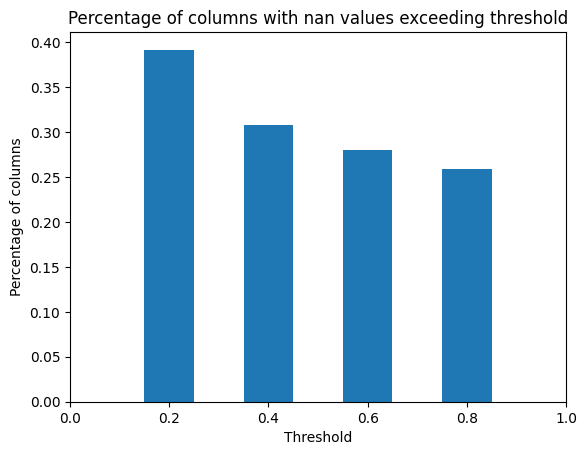

In [4]:
column_names = df.columns
# check for nan rate
from matplotlib import pyplot as plt
#plot, ax = plt.subplots(figsize=(20, 40))
#ax.barh(column_names, df.isna().sum() / df.shape[0])

import visualize
importlib.reload(visualize)
visualize.visualize_nan(df)
plt.savefig('nan_rate.png')

In [5]:
# threshold for nan rate
column_threshold = 0.7
row_threshold = 0.0
preprocess.cleanup_df(df, column_threshold, row_threshold)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,12000,12000.0,60 months,14.08,279.72,C,C3,house keeper,10+ years,...,66.7,0.0,0.0,73948.0,45212.0,6200.0,49448.0,N,Cash,N
2260664,12000,12000,12000.0,60 months,25.82,358.01,E,E4,Skilled Labor,< 1 year,...,50.0,0.0,0.0,382275.0,12928.0,11400.0,12125.0,N,Cash,N
2260665,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Teacher,10+ years,...,100.0,0.0,0.0,203417.0,36448.0,2000.0,29317.0,N,Cash,N
2260666,12000,12000,12000.0,60 months,21.45,327.69,D,D5,NaN,NaN,...,0.0,0.0,0.0,118975.0,65238.0,22000.0,81975.0,N,Cash,N


(0.0, 1.0)

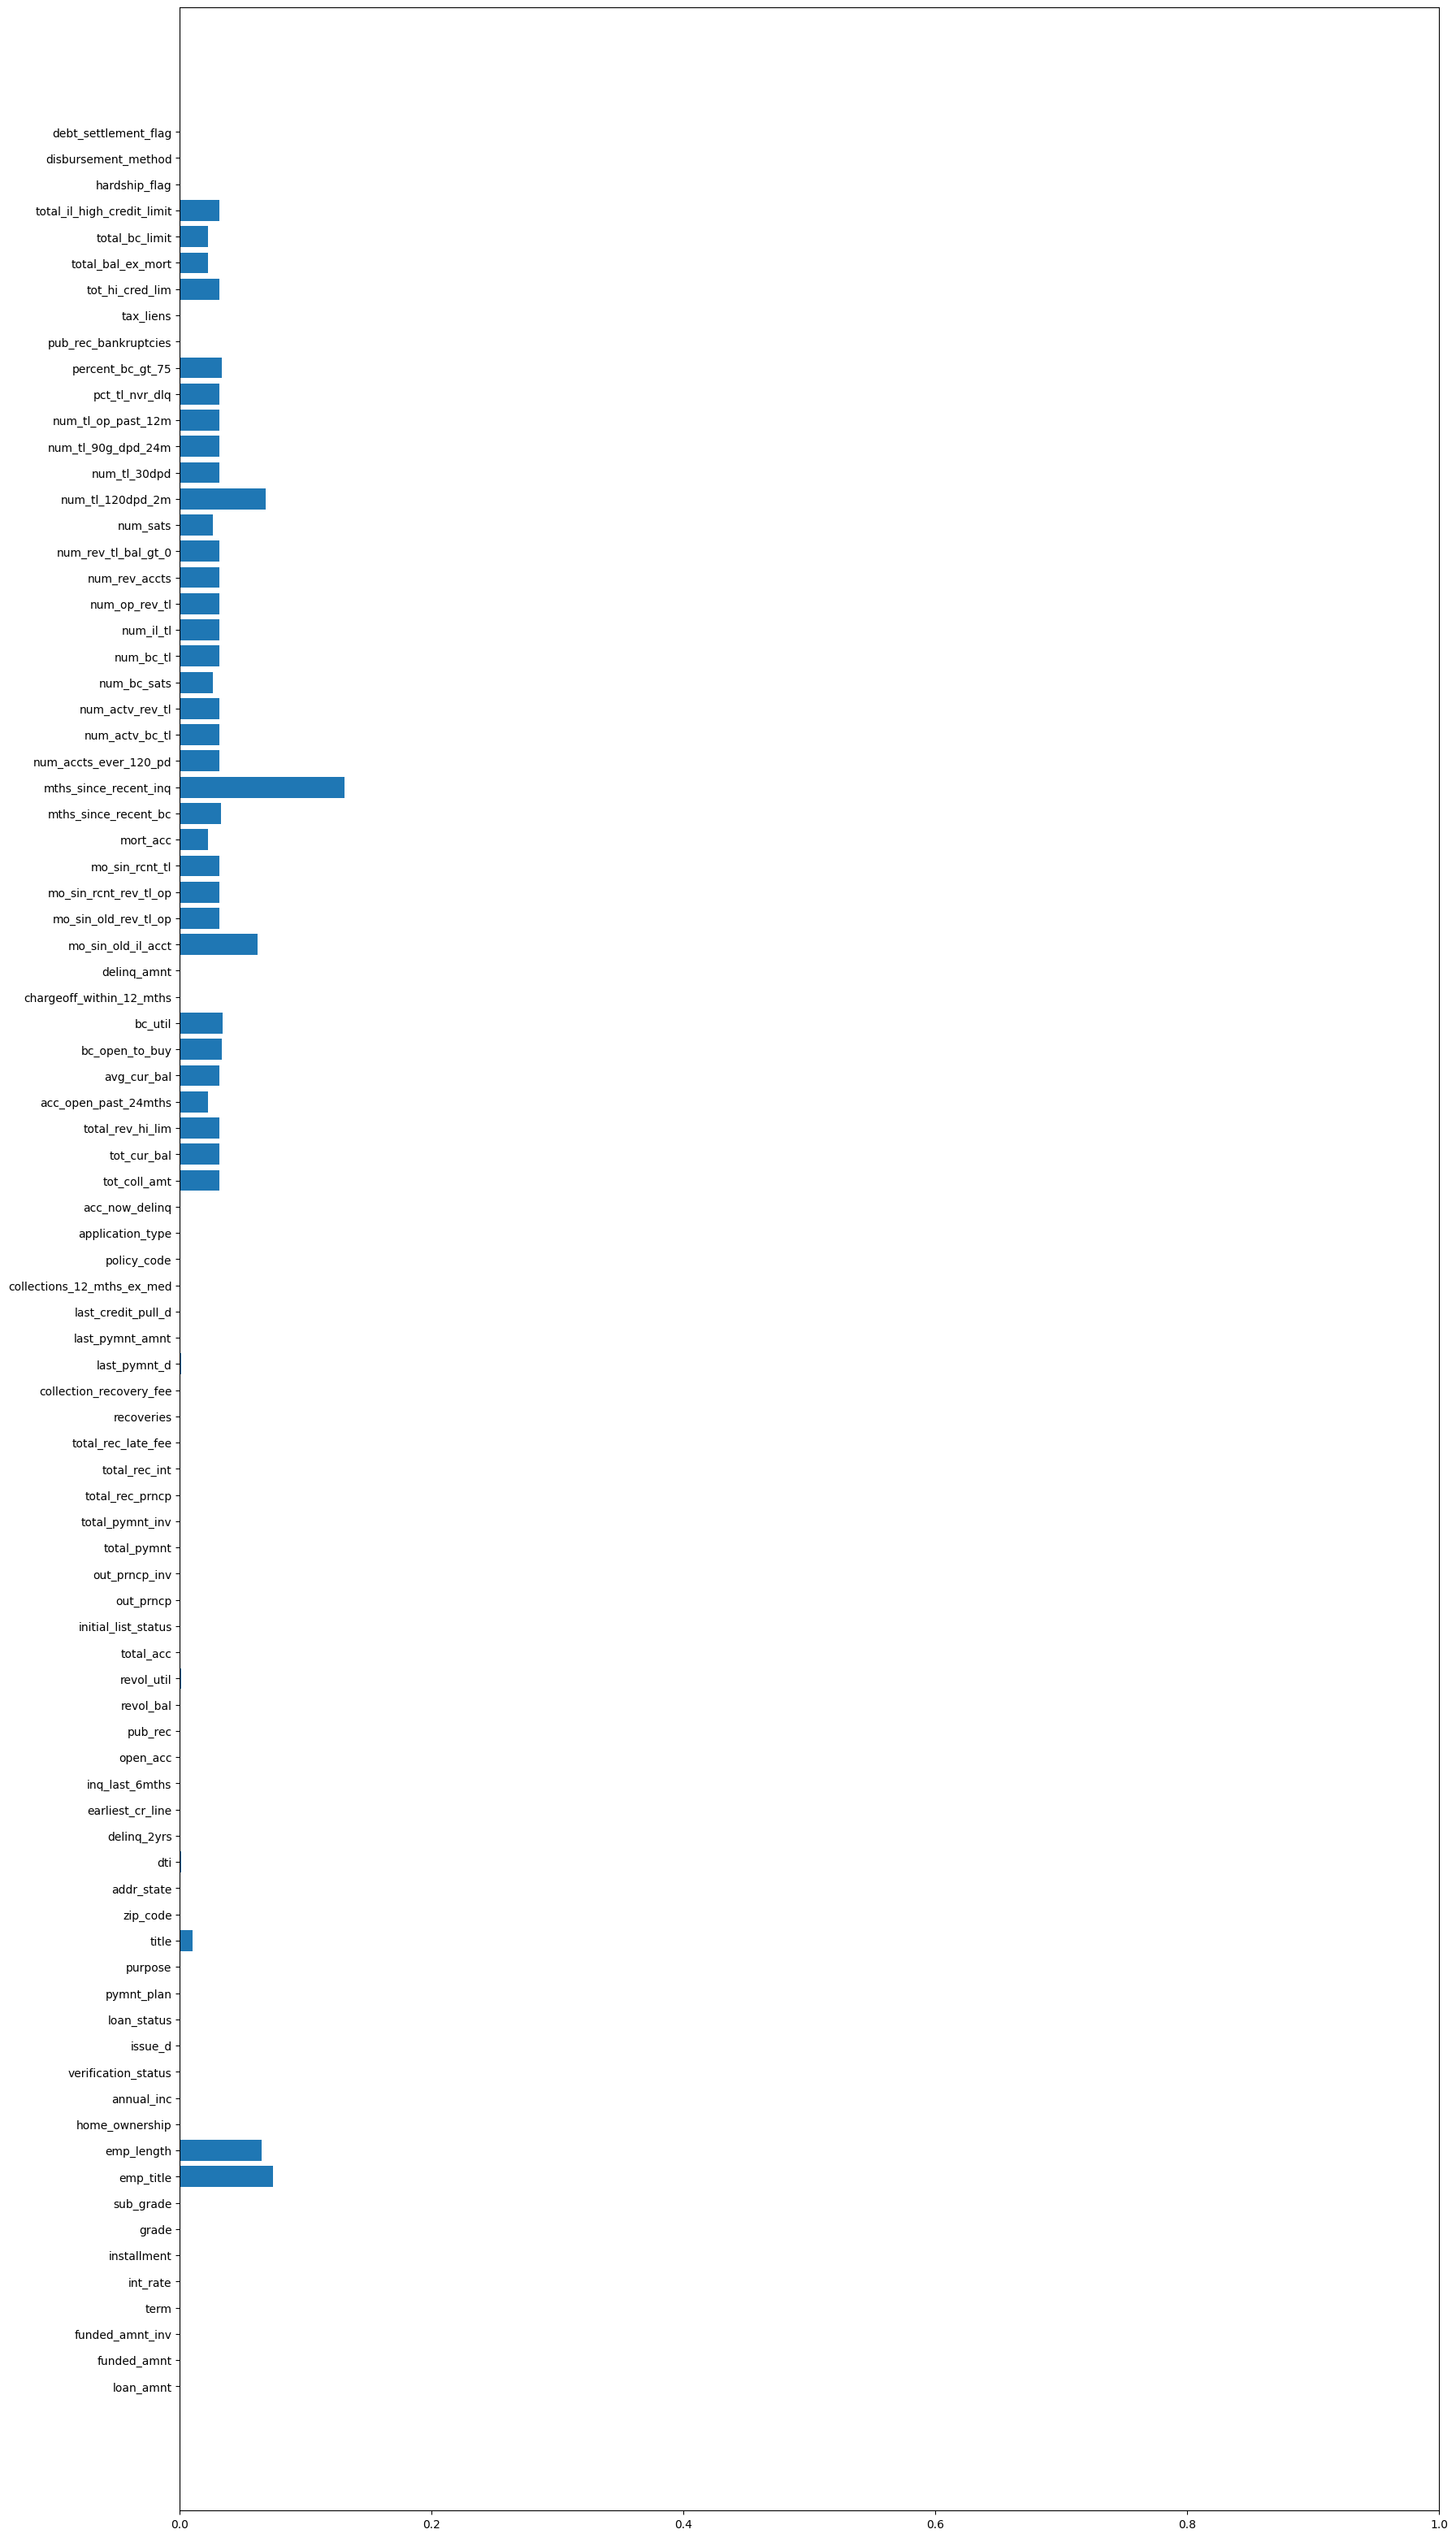

In [6]:
# check for nan rate
plot, ax = plt.subplots(figsize=(20, 40))
ax.barh(df.columns, df.isna().sum() / df.shape[0])
# get x to be 0 - 1
ax.set_xlim(0, 1)


In [7]:
# seperation of columns

categorical_columns = ['emp_title', 'home_ownership', 'verification_status', 
                       'issue_d', 'issue_d', 'purpose', 
                       'zip_code', 'addr_state', 'earliest_cr_line',
                       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
                       'application_type', 'hardship_flag', 'disbursement_method',
                       'debt_settlement_flag']

categorical_columns.remove('emp_title') # too many unique values
categorical_columns.remove('zip_code') # too many unique values

categorical_ordinal = ['grade', 'sub_grade', 'emp_length']

numerical_columns = ['loan_amnt', 'funded_amnt', 'int_rate',
                     'installment', 'annual_inc', 'dti',
                     'delinq_2yrs', 'inq_last_6mths', 'open_acc',
                     'revol_bal', 'revol_util', 'total_acc',
                     'total_pymnt','total_rec_late_fee','recoveries',
                     'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
                     'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
                     'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
                     'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
                     'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
                     'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
                     'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd',
                     'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
                     'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                     'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
                     'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
                     'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
                     'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
                     'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']

In [8]:
# check categorical unique
unique_counts = df[categorical_columns].nunique()
print(unique_counts)

home_ownership            6
verification_status       3
issue_d                 139
issue_d                 139
purpose                  14
addr_state               51
earliest_cr_line        754
initial_list_status       2
last_pymnt_d            135
last_credit_pull_d      140
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
dtype: int64


In [9]:
importlib.reload(preprocess)
from preprocess import encode_numerical, encode_categorical, encode_categorical_ordinal, encode_target

# encode numerical and categorical
numerical_feature = encode_numerical(df, numerical_columns, scaling='minmax')
categorical_feature, categorical_feature_name = encode_categorical(df, categorical_columns)
# Optional Hash Encoding
#categorical_feature, _ = encode_categorical(df, categorical_columns, hash=True)

grade = sorted(df['grade'].unique())
sub_grade = sorted(df['sub_grade'].unique())
emp_length = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
order = [grade, sub_grade, emp_length]

categorical_ordinal_feature = encode_categorical_ordinal(df, categorical_ordinal, order)

print("numerical feature shape: ", numerical_feature.shape)
print("categorical feature shape: ", categorical_feature.shape)
print("categorical ordinal feature shape: ", categorical_ordinal_feature.shape)

/Users/lancewong/Documents/applied machine learning/Lending_Club_Loan_Prediction/preprocess.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df.fillna(numerical_df.mean(), inplace=True)
/Users/lancewong/Documents/applied machine learning/Lending_Club_Loan_Prediction/preprocess.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df.fillna(categorical_df.mode(), inplace=True)


numerical feature shape:  (2260668, 57)
categorical feature shape:  (2260668, 1394)
categorical ordinal feature shape:  (2260668, 3)


In [10]:
# encode label
importlib.reload(preprocess)
classes, labels, mask = encode_target(df, 'loan_status')

categorical_feature = categorical_feature[mask]
categorical_ordinal_feature = categorical_ordinal_feature[mask]
numerical_feature = numerical_feature[mask]

print("numerical feature shape: ", numerical_feature.shape)
print("categorical feature shape: ", categorical_feature.shape)
print("categorical ordinal feature shape: ", categorical_ordinal_feature.shape)

numerical feature shape:  (1306356, 57)
categorical feature shape:  (1306356, 1394)
categorical ordinal feature shape:  (1306356, 3)


In [11]:
# remove leakage features
numerical_columns.remove('total_pymnt')
numerical_columns.remove('total_rec_late_fee') 
numerical_columns.remove('recoveries')
numerical_columns.remove('collection_recovery_fee')
numerical_columns.remove('num_tl_120dpd_2m') 
numerical_columns.remove('num_tl_30dpd') 
numerical_columns.remove('num_tl_90g_dpd_24m') 
# highly correlated features
numerical_columns.remove('total_rev_hi_lim') 
numerical_columns.remove('avg_cur_bal')
numerical_columns.remove('bc_util')
numerical_columns.remove('num_actv_rev_tl')
numerical_columns.remove('num_bc_sats')
numerical_columns.remove('num_op_rev_tl')
numerical_columns.remove('num_rev_accts')
numerical_columns.remove('num_rev_tl_bal_gt_0')
numerical_columns.remove('num_sats')
numerical_columns.remove('percent_bc_gt_75')
numerical_columns.remove('tot_hi_cred_lim')
numerical_columns.remove('total_bc_limit')
numerical_columns.remove('total_il_high_credit_limit')

### SVM

In [22]:
import svm_lr
importlib.reload(svm_lr)

<module 'svm_lr' from '/Users/lancewong/Documents/applied machine learning/Lending_Club_Loan_Prediction/svm_lr.py'>

In [13]:
# Preprocess and reduce dimensionality
X, y = svm_lr.preprocess_features(numerical_feature, categorical_feature, categorical_ordinal_feature, labels)
X_reduced = svm_lr.reduce_dimensionality(X)
X_train, X_test, y_train, y_test = svm_lr.train_test_split(X_reduced, y, test_size=0.2, random_state=42)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ..............................................C=1.0; total time= 1.4min
[CV] END ............................................C=0.001; total time= 1.9min
[CV] END ...............................C=31.622776601683793; total time= 1.9min
[CV] END ..............................................C=1.0; total time= 1.9min
[CV] END ...........................................C=1000.0; total time=   7.0s
[CV] END ...............................C=31.622776601683793; total time= 2.0min
[CV] END ..............................C=0.03162277660168379; total time= 2.0min
[CV] END ............................................C=0.001; total time= 2.0min
[CV] END ...............................C=31.622776601683793; total time= 2.0min
[CV] END ..............................C=0.03162277660168379; total time= 2.0min
[CV] END ...........................................C=1000.0; total time=   6.7s
[CV] END ........................................

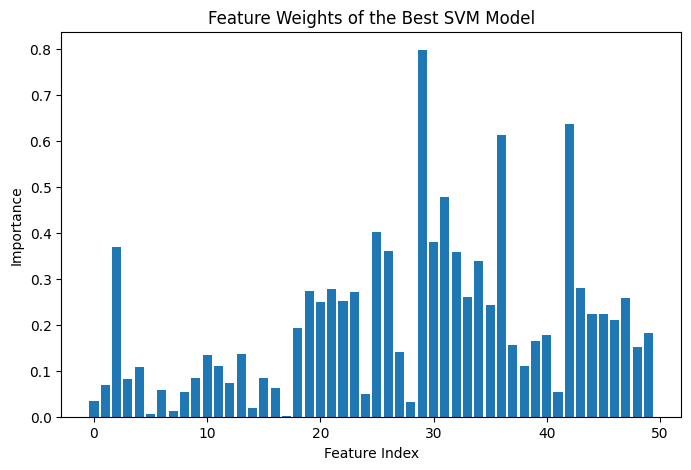

In [23]:
# SVM model training and evaluation
best_params_svm, svm_model = svm_lr.perform_random_search_svm(X_train, y_train, svm_lr.svm_param_distributions)
metrics_svm, y_pred_svm = svm_lr.evaluate_model(svm_model, X_test, y_test)
svm_lr.visualize_feature_importances_svm(svm_model, X_train.shape[1])

### Linear Regression

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ................................C=0.001, penalty=l2; total time=   8.4s
[CV] END ................................C=0.001, penalty=l2; total time=   9.2s
[CV] END ..................................C=1.0, penalty=l2; total time=  46.1s
[CV] END ..................................C=1.0, penalty=l2; total time=  46.5s
[CV] END ...............................C=1000.0, penalty=l1; total time=  51.6s
[CV] END ...............................C=1000.0, penalty=l1; total time=  52.3s
              precision    recall  f1-score   support

         0.0       0.77      0.36      0.49     52212
         1.0       0.86      0.97      0.91    209060

    accuracy                           0.85    261272
   macro avg       0.81      0.67      0.70    261272
weighted avg       0.84      0.85      0.83    261272

Accuracy: 0.851
Precision: 0.859
Recall: 0.973
F1: 0.912
Roc_auc: 0.667
Ap: 0.858
Confusion_matrix: 65318.000


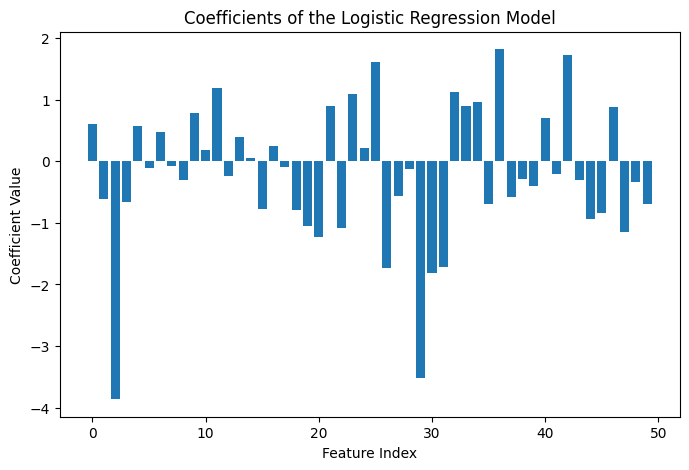

In [15]:
# Logistic Regression model training and evaluation
best_params_logistic, logistic_model = svm_lr.perform_random_search_logistic(X_train, y_train, svm_lr.logistic_param_distributions)
metrics_logistic, y_pred_logistic = svm_lr.evaluate_model(logistic_model, X_test, y_test)
svm_lr.visualize_coefficients_logistic(logistic_model, X_train.shape[1])